## 1. Carga de datos
#### Filtro Madrid y elimino variables no relevantes

In [127]:
import numpy  as np  
import pandas as pd

In [128]:
#Cargo fichero
raw_data = pd.read_csv("airbnb-listings-extract.csv", sep=';')
print(raw_data.shape)
raw_data.head(5).T  #datos en bruto

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


#### Filtro y me quedo sólo con los datos correspondientes a Madrid.

In [129]:
# Análisis de España
total_filas = len(raw_data)
spain_count = raw_data[raw_data['Country'] == 'Spain'].shape[0]
spain_percentage = (spain_count / total_filas) * 100

print(f"Total dataset: {total_filas:,} propiedades")
print(f"Total España: {spain_count:,} propiedades ({spain_percentage:.2f}%)")

Total dataset: 14,780 propiedades
Total España: 14,001 propiedades (94.73%)


In [130]:
# Análisis de Madrid 
total_filas = len(raw_data)

# Buscar en Madrid
madrid_filter = raw_data['City'].str.contains('madrid', case=False, na=False)
madrid_count = madrid_filter.sum()
madrid_percentage = (madrid_count / total_filas) * 100

# Buscar otras ciudades de la Comunidad de Madrid
ciudades_madrid = [
    'pozuelo', 'alcalá', 'alcala', 'getafe', 'leganés', 'leganes', 'fuenlabrada', 
    'alcorcón', 'alcorcon', 'móstoles', 'mostoles', 'torrejón', 'torrejon',
    'parla', 'alcobendas', 'aranjuez', 'coslada', 'las rozas', 'majadahonda',
    'rivas', 'collado villalba', 'boadilla', 'san sebastián de los reyes',
    'san sebastian de los reyes', 'tres cantos', 'valdemoro', 'pinto',
    'arganda', 'chinchón', 'chinchon', 'navalcarnero', 'colmenar viejo'
]

otras_madrid_filter = raw_data['City'].str.contains('|'.join(ciudades_madrid), case=False, na=False) & ~madrid_filter
otras_madrid_count = otras_madrid_filter.sum()
otras_madrid_percentage = (otras_madrid_count / total_filas) * 100

# Total Comunidad de Madrid
total_madrid_count = madrid_count + otras_madrid_count
total_madrid_percentage = (total_madrid_count / total_filas) * 100

print(f"Total dataset: {total_filas:,} propiedades")
print(f"Total Madrid: {total_madrid_count:,} propiedades ({total_madrid_percentage:.2f}%)")

Total dataset: 14,780 propiedades
Total Madrid: 13,252 propiedades (89.66%)


Elegir Madrid supone perder cerca de un 11% de datos, lo cual es bastante dado el tamaño del dataset. Pero elegir como muestra España (y perder sólo 5%) puede estar metiendo más variabilidad al modelo para Madrid si los precios entre comunidades son muy diferentes y no habría suficiente muestra representativa del resto de ciudades

In [131]:
# Filtro Madrid
total_madrid_filter = madrid_filter | otras_madrid_filter

# Creo copia filtrada por Madrid 
raw_data_madrid = raw_data[total_madrid_filter].copy() #sólo madrid 

print(f"Dataset original: {raw_data.shape}")
print(f"Dataset Madrid: {raw_data_madrid.shape}")
print(f"Registros eliminados: {len(raw_data) - len(raw_data_madrid):,}")

Dataset original: (14780, 89)
Dataset Madrid: (13252, 89)
Registros eliminados: 1,528


#### Elimino variables no relevantes para caso estudio ya que no voy a hacer procesamiento de texto (Url's, Id's, descripciones y metadata). 
Además elimino las columnas `City`, `Country` por seleccionar sólo Madrid

In [132]:
# una copia de los datos para trabajar 
data_madrid= raw_data_madrid.copy()

columns_to_drop = [
    'ID', 'Listing Url', 'Scrape ID', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 
    'Host Picture Url', 'Last Scraped', 'Name', 'Summary', 'Space', 
    'Description', 'Neighborhood Overview', 'License', 'Jurisdiction Names', 
    'Cancellation Policy', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host ID', 'Host Name', 
    'Host Location', 'Host About', 'Host Response Time', 'Geolocation', 'Smart Location', 'Market', 'Street', 
    'Host Verifications', 'Neighbourhood', 'Neighbourhood Cleansed', 'State',
    'Neighbourhood Group Cleansed', 'Country Code', 'Calendar Updated', 'City', 'Country',
    'Calendar last Scraped', 'Features', 'Host Neighbourhood'
]

input_madrid= data_madrid.drop(columns=columns_to_drop)  # Aplico la eliminación de variables

print(f"Dataset original: {raw_data.shape}")
print(f"Dataset después de limpieza: {input_madrid.shape}")
input_madrid.head(5).T #sólo madrid sin columnas texto

Dataset original: (14780, 89)
Dataset después de limpieza: (13252, 44)


,40,41,42,43,44
Experiences Offered,none,none,none,none,none
Host Since,2015-01-06,2015-01-01,2016-04-18,2012-09-08,2013-12-25
Host Response Rate,84.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Listings Count,3.0,1.0,2.0,8.0,2.0
Host Total Listings Count,3.0,1.0,2.0,8.0,2.0
Zipcode,28007,28001,28001,28001,28001
Latitude,40.406953,40.425904,40.428352,40.427454,40.428671
Longitude,-3.670894,-3.681647,-3.687155,-3.685763,-3.685423
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment


#### Coloco la variable objetivo en la posición 0 (primera columna) para facilidad del análisis

In [ ]:
# Coloco Price en el índice 0 (primera columna)
price_col = input_madrid['Price']
input_madrid = input_madrid.drop('Price', axis=1)
input_madrid.insert(0, 'Price', price_col)

input_madrid.head(5).T 
#input_madrid.shape

,40,41,42,43,44
Price,28.0,58.0,70.0,26.0,70.0
Experiences Offered,none,none,none,none,none
Host Since,2015-01-06,2015-01-01,2016-04-18,2012-09-08,2013-12-25
Host Response Rate,84.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Listings Count,3.0,1.0,2.0,8.0,2.0
Host Total Listings Count,3.0,1.0,2.0,8.0,2.0
Zipcode,28007,28001,28001,28001,28001
Latitude,40.406953,40.425904,40.428352,40.427454,40.428671
Longitude,-3.670894,-3.681647,-3.687155,-3.685763,-3.685423


## 2. División de datos Train / Test
#### Aplico método `train_test_split` para separación fisica en dos archivos .csv (datos de entrenamiento y prueba)

In [137]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(input_madrid, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('airbnb-listings-extract-train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb-listings-extract-test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10601, 44)
Dimensiones del dataset de test: (2651, 44)


In [138]:
# Trabajo sólo con el dataset de train

pretrain_data = pd.read_csv('airbnb-listings-extract-train.csv', sep=';', decimal='.') #Train de sólo madrid sin columnas texto
pretrain_data.head(5).T

,0,1,2,3,4
Price,40.0,18.0,59.0,19.0,74.0
Experiences Offered,none,none,none,none,none
Host Since,2013-01-22,2016-01-29,2014-07-26,2016-06-08,2014-03-06
Host Response Rate,100.0,100.0,100.0,80.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Listings Count,2.0,4.0,1.0,1.0,2.0
Host Total Listings Count,2.0,4.0,1.0,1.0,2.0
Zipcode,28015,28028,28005,28032,28004
Latitude,40.424541,40.435688,40.413167,40.407085,40.420483
Longitude,-3.711495,-3.671686,-3.708769,-3.607053,-3.703334


## 3. Análisis exploratorio
#### Miro los datos de Train para saber distribuciones estadisticas, outliers, correlaciones.
- info, describe...
- Histogramas, scatterplots..
- (Matriz correlaciones entre variables)
- (Método de filtrado: `f_reg, mutual_info_reg`)

In [139]:
# Clasificación de variables: Numéricas vs Categóricas
numerical_var = pretrain_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_var = pretrain_data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"{len(pretrain_data.columns)} variables total | {len(numerical_var)} numéricas | {len(categorical_var)} categóricas")

44 variables total | 35 numéricas | 9 categóricas


### 3.1 Análisis exploratorio - Variables categórcias

Voy a estudiar primero las categoricas:

| Atributo | descripción | conclusión |
|:---------|:------------|:-----------|
| *Experiences Offered* | experiencias adicionales al piso | |
| *Host Since* | fecha registro del anfitrión en Airbnb | Pasar a días --> númerica y tratar nulos =0|
| *Host Acceptance Rate* | % solicitudes aceptadas por anfitrión | Eliminar por alto valor de nulos|
| *City* | ciudad | Filtrado previamente por Madrid: eliminar |
| *ZipCode* | código barras | Standby |
| *Country* | pais | Eliminar |
| *Property Type* | tipo de propiedad | |
| *Room Type* | tipo de habitación | |
| *Bed Type* | tipo de cama | |
| *Amenities* | comodidades adicionales | Standby |
| *Has Availability* | disponibilidad actual | Eliminar por alto valor de nulos|
| *First Review* | fecha primera reseña | Hacer la diferencia a dias con Last Review y tratar nulos=0|
| *Last Review* | fecha última reseña | 

In [140]:
# Variables CATEGÓRICAS
categorical_data = []
categorical_var = pretrain_data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_var:
    null_pct = (pretrain_data[col].isnull().sum() / len(pretrain_data)) * 100
    categorical_data.append({
        'Variable': col,
        'Dtype': str(pretrain_data[col].dtype),
        'Valores_únicos': pretrain_data[col].nunique(),
        'Nulos_%': round(null_pct, 2),
    })

categorical_df = pd.DataFrame(categorical_data)
display(categorical_df)

,Variable,Dtype,Valores_únicos,Nulos_%
0,Experiences Offered,object,1,0.00
1,Host Since,object,1996,0.02
2,Zipcode,object,74,3.25
3,Property Type,object,22,0.00
4,Room Type,object,3,0.00
5,Bed Type,object,5,0.00
6,Amenities,object,9062,0.78
7,First Review,object,1510,20.60
8,Last Review,object,652,20.61


`Propierty Type`, `Room Type`, `Bed Type` veamos valores únicos e histograma


ANÁLISIS DE PROPERTY TYPE
Valores únicos: 20

Distribución de frecuencias:
Property Type
Apartment             8765
House                  769
Condominium            269
Bed & Breakfast        264
Loft                   232
Other                  166
Dorm                    36
Guesthouse              29
Chalet                  21
Hostel                  13
Serviced apartment       9
Townhouse                8
Boutique hotel           5
Villa                    4
Casa particular          3
Guest suite              2
Earth House              2
Tent                     1
Camper/RV                1
Bungalow                 1
Name: count, dtype: int64

--------------------------------------------------

ANÁLISIS DE ROOM TYPE
Valores únicos: 3

Distribución de frecuencias:
Room Type
Entire home/apt    6347
Private room       4106
Shared room         147
Name: count, dtype: int64

--------------------------------------------------

ANÁLISIS DE BED TYPE
Valores únicos: 5

Distribución de frec

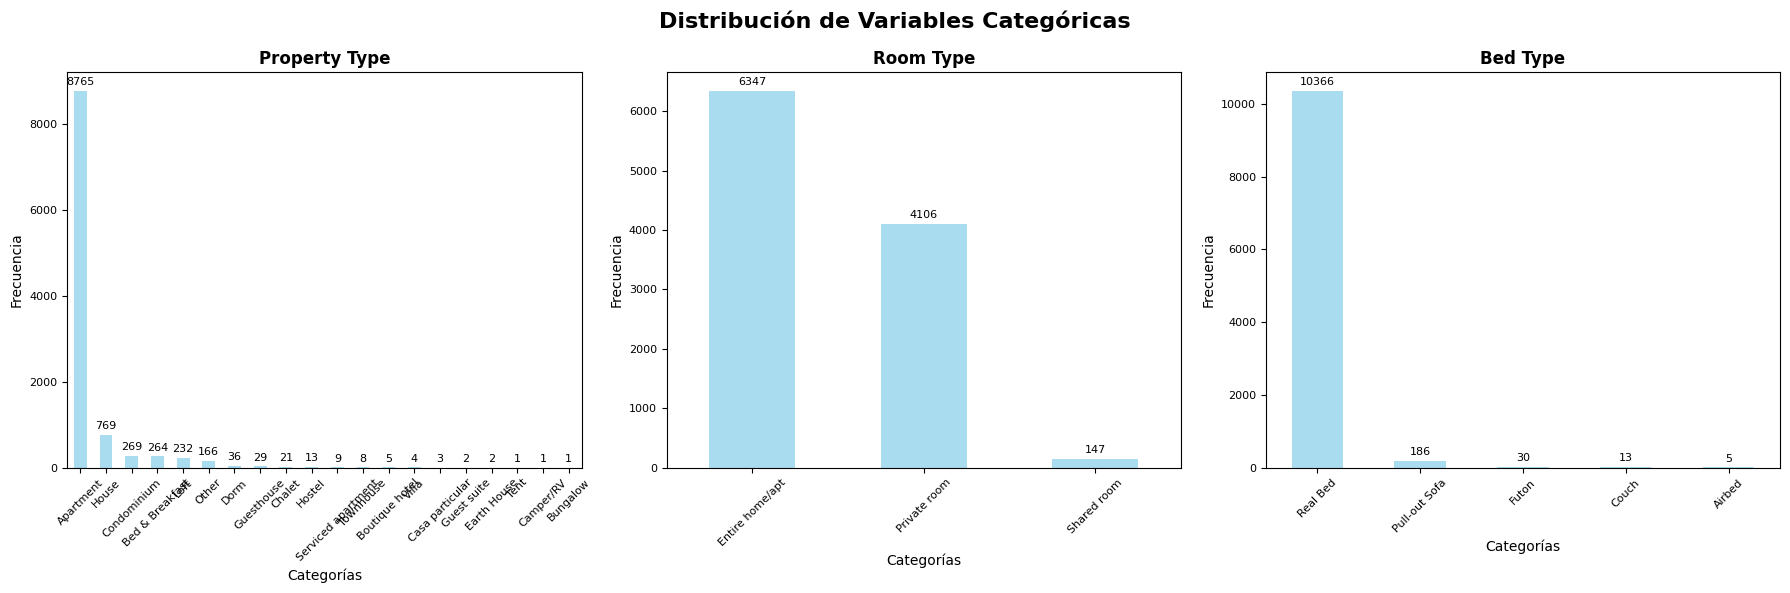

In [141]:
# Análisis de Property Type, Room Type, Bed Type con histogramas
import matplotlib.pyplot as plt
import seaborn as sns

variables_categoricas = ['Property Type', 'Room Type', 'Bed Type']

# Configurar el estilo de los gráficos
plt.style.use('default')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_categoricas):
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE {var.upper()}")
    print(f"{'='*50}")
    
    # Valores únicos
    valores_unicos = pretrain_data_madrid[var].nunique()
    print(f"Valores únicos: {valores_unicos}")
    
    # Distribución de frecuencias
    print(f"\nDistribución de frecuencias:")
    distribucion = pretrain_data_madrid[var].value_counts()
    print(distribucion)
    
    # Crear histograma
    ax = axes[i]
    distribucion.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{var}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Categorías', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    # Añadir valores en las barras
    for j, v in enumerate(distribucion.values):
        ax.text(j, v + max(distribucion.values) * 0.01, str(v), 
                ha='center', va='bottom', fontsize=8)
    
    print(f"\n" + "-"*50)

plt.tight_layout()
plt.show()

In [142]:
pretrain_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10594.0,65.886445,56.461287,9.000000,30.000000,52.000000,80.000000,875.000000
Host Response Rate,9271.0,94.869809,15.116170,0.000000,100.000000,100.000000,100.000000,100.000000
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,10599.0,9.856213,27.773171,0.000000,1.000000,2.000000,5.000000,265.000000
Host Total Listings Count,10599.0,9.856213,27.773171,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,10601.0,40.420551,0.020170,40.331888,40.410064,40.418674,40.427853,40.514247
Longitude,10601.0,-3.697160,0.023600,-3.835498,-3.707774,-3.701521,-3.693830,-3.573613
Accommodates,10601.0,3.187907,1.991389,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10563.0,1.256698,0.606622,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10587.0,1.291773,0.820903,0.000000,1.000000,1.000000,2.000000,10.000000


In [143]:
pretrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10601 entries, 0 to 10600
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           10594 non-null  float64
 1   Experiences Offered             10601 non-null  object 
 2   Host Since                      10599 non-null  object 
 3   Host Response Rate              9271 non-null   float64
 4   Host Acceptance Rate            0 non-null      float64
 5   Host Listings Count             10599 non-null  float64
 6   Host Total Listings Count       10599 non-null  float64
 7   Zipcode                         10256 non-null  object 
 8   Latitude                        10601 non-null  float64
 9   Longitude                       10601 non-null  float64
 10  Property Type                   10601 non-null  object 
 11  Room Type                       10601 non-null  object 
 12  Accommodates                    

## 4. Preprocesado datos Train
#### Proceso datos de train en función de las conclusiones estadisticas
- Imputación de valores ausentes
- Codificación variables categoricas
- (Eliminación por random forest/Lasso, muchos Nan, alta correlación..)
- (Generación y transformación de variables)
- (Filtrado outliers)

`Property Type` agrupo por Apartment, House, Condominium, Bed & Breakfast, Loft y el resto todo en Other. Hago un mean encoding con el precio (Esto puedo hacerlo porque ya tengo la división de train y test, y lo estoy haciendo sólo teniendo en cuenta los datos de train). Crear variables dummy generaria demasiadas caracteristicas nuevas.

`First Review`, `Last Review` Voya usar la diferencia en días para tratarla como númerica (y sacar la frecuencia de revisones conjunto a `Number of reviews`más adelante)

In [144]:
import pandas as pd

pretrain_data_final = pretrain_data.copy() #Train de sólo madrid sin columnas texto con transformaciones aplicadas

# Convertir a datetime
pretrain_data_final['First Review'] = pd.to_datetime(pretrain_data_final['First Review'], errors='coerce')
pretrain_data_final['Last Review'] = pd.to_datetime(pretrain_data_final['Last Review'], errors='coerce')

# Calcular diferencia en días
pretrain_data_final['Review_Days_Diff'] = (pretrain_data_final['Last Review'] - pretrain_data_final['First Review']).dt.days

# Rellenar valores nulos con 0 y aseguro que no haya valores negativos
pretrain_data_final['Review_Days_Diff'] = pretrain_data_final['Review_Days_Diff'].fillna(0)
pretrain_data_final['Review_Days_Diff'] = pretrain_data_final['Review_Days_Diff'].clip(lower=0)

# Nueva columna
print(f"Nueva columna 'Review_Days_Diff' creada:")
print(f"Tipo de datos: {pretrain_data_final['Review_Days_Diff'].dtype}")
print(f"Valores únicos: {pretrain_data_final['Review_Days_Diff'].nunique()}")

print(pretrain_data_final['Review_Days_Diff'].describe())

# Mostrar algunos ejemplos
print(f"\nPrimeros 10 valores:")
print(pretrain_data_final[['First Review', 'Last Review', 'Review_Days_Diff']].head(5))

Nueva columna 'Review_Days_Diff' creada:
Tipo de datos: float64
Valores únicos: 1495
count    10601.000000
mean       322.296387
std        409.786033
min          0.000000
25%          0.000000
50%        168.000000
75%        494.000000
max       2519.000000
Name: Review_Days_Diff, dtype: float64

Primeros 10 valores:
  First Review Last Review  Review_Days_Diff
0   2013-10-08  2016-09-19            1077.0
1   2016-05-16  2016-08-19              95.0
2   2014-08-11  2017-03-19             951.0
3   2016-10-26  2016-10-30               4.0
4   2015-03-15  2017-03-31             747.0


- `Host Acceptance Rate`, `Has Availability`: puedo eliminarlas porque todos son valores nulos 

- `First Review`, `Last Review`: puedo eliminarlas porque las transforme en `Review_Days_Diff`

- `Zipcode`, `Amenities`,`Propierty Type`, `Room Type`, `Bed Type`: las elimino y no la voy a incluir de momento

In [145]:
# Eliminar columnas especificadas del dataset pretrain_data
columns_to_remove = [
    'Experiences Offered', 'Host Since', 'Host Acceptance Rate', 'Has Availability',
    'First Review', 'Last Review', 'Zipcode', 'Amenities', 'Property Type', 
    'Room Type', 'Bed Type'
]

# Eliminar las columnas existentes
pretrain_data_final = pretrain_data_final.drop(columns=columns_to_remove)

print(f"\nDataset original: {pretrain_data.shape}")
print(f"Dataset después de eliminar columnas: {pretrain_data_final.shape}")
print(f"Columnas eliminadas: {len(columns_to_remove)}")

# Mostrar las primeras filas del dataset limpio
pretrain_data_final.head().T


Dataset original: (10601, 44)
Dataset después de eliminar columnas: (10601, 34)
Columnas eliminadas: 11


,0,1,2,3,4
Price,40.000000,18.000000,59.000000,19.000000,74.000000
Host Response Rate,100.000000,100.000000,100.000000,80.000000,100.000000
Host Listings Count,2.000000,4.000000,1.000000,1.000000,2.000000
Host Total Listings Count,2.000000,4.000000,1.000000,1.000000,2.000000
Latitude,40.424541,40.435688,40.413167,40.407085,40.420483
Longitude,-3.711495,-3.671686,-3.708769,-3.607053,-3.703334
Accommodates,2.000000,2.000000,2.000000,1.000000,4.000000
Bathrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Bedrooms,NaN,1.000000,1.000000,1.000000,1.000000
Beds,1.000000,2.000000,1.000000,1.000000,2.000000


In [146]:
# IMPUTACIÓN SIMPLE 

# Imputar con mediana (más robusta que la media ante outliers)
for col in pretrain_data_final.columns:
    if pretrain_data_final[col].isnull().any():
            median_value = pretrain_data_final[col].median()
            pretrain_data_final[col] = pretrain_data_final[col].fillna(median_value)
            print(f"• {col}: imputado con mediana = {median_value:.2f}")

# Verificar resultado
print(f"\nNulos DESPUÉS:")
nulls_after = pretrain_data_final.isnull().sum()
nulls_after = nulls_after[nulls_after > 0]

if len(nulls_after) == 0:
    print("No quedan valores nulos")
else:
    print("Aún quedan nulos:")
    for col, count in nulls_after.items():
        print(f"• {col}: {count}")



• Price: imputado con mediana = 52.00
• Host Response Rate: imputado con mediana = 100.00
• Host Listings Count: imputado con mediana = 2.00
• Host Total Listings Count: imputado con mediana = 2.00
• Bathrooms: imputado con mediana = 1.00
• Bedrooms: imputado con mediana = 1.00
• Beds: imputado con mediana = 1.00
• Square Feet: imputado con mediana = 108.00
• Weekly Price: imputado con mediana = 350.00
• Monthly Price: imputado con mediana = 1200.00
• Security Deposit: imputado con mediana = 150.00
• Cleaning Fee: imputado con mediana = 25.00
• Review Scores Rating: imputado con mediana = 94.00
• Review Scores Accuracy: imputado con mediana = 10.00
• Review Scores Cleanliness: imputado con mediana = 10.00
• Review Scores Checkin: imputado con mediana = 10.00
• Review Scores Communication: imputado con mediana = 10.00
• Review Scores Location: imputado con mediana = 10.00
• Review Scores Value: imputado con mediana = 9.00
• Reviews per Month: imputado con mediana = 1.26

Nulos DESPUÉS:


## 5. Procesado datos Test
#### Aplico las mismas transformaciones que en Train

RESUMEN TRANSFORMACIONES EN TRAIN

In [147]:
#CARGO DATOS TRAIN
pretrain_data = pd.read_csv('airbnb-listings-extract-train.csv', sep=';', decimal='.') #Train de sólo madrid sin columnas texto


#COPIA PARA APLICAR LAS TRANSFORMACIONES
pretrain_data_final = pretrain_data.copy() #Train de sólo madrid sin columnas texto con transformaciones aplicadas


#COLUMNA NUEVA 'Review_Days_Diff'
# Convertir a datetime
pretrain_data_final['First Review'] = pd.to_datetime(pretrain_data_final['First Review'], errors='coerce')
pretrain_data_final['Last Review'] = pd.to_datetime(pretrain_data_final['Last Review'], errors='coerce')
# Calcular diferencia en días
pretrain_data_final['Review_Days_Diff'] = (pretrain_data_final['Last Review'] - pretrain_data_final['First Review']).dt.days
# Rellenar valores nulos con 0 y aseguro que no haya valores negativos
pretrain_data_final['Review_Days_Diff'] = pretrain_data_final['Review_Days_Diff'].fillna(0)
pretrain_data_final['Review_Days_Diff'] = pretrain_data_final['Review_Days_Diff'].clip(lower=0)


#ELIMINO COLUMNAS
# Eliminar columnas especificadas del dataset pretrain_data
columns_to_remove = [
    'Experiences Offered', 'Host Since', 'Host Acceptance Rate', 'Has Availability',
    'First Review', 'Last Review', 'Zipcode', 'Amenities', 'Property Type', 
    'Room Type', 'Bed Type'
]
# Eliminar las columnas existentes
pretrain_data_final = pretrain_data_final.drop(columns=columns_to_remove)


#IMPUTACIÓN NULOS
for col in pretrain_data_final.columns:
    if pretrain_data_final[col].isnull().any():
            median_value = pretrain_data_final[col].median()
            pretrain_data_final[col] = pretrain_data_final[col].fillna(median_value)

In [148]:
pretrain_data_final.head(5).T

,0,1,2,3,4
Price,40.000000,18.000000,59.000000,19.000000,74.000000
Host Response Rate,100.000000,100.000000,100.000000,80.000000,100.000000
Host Listings Count,2.000000,4.000000,1.000000,1.000000,2.000000
Host Total Listings Count,2.000000,4.000000,1.000000,1.000000,2.000000
Latitude,40.424541,40.435688,40.413167,40.407085,40.420483
Longitude,-3.711495,-3.671686,-3.708769,-3.607053,-3.703334
Accommodates,2.000000,2.000000,2.000000,1.000000,4.000000
Bathrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,1.000000,2.000000,1.000000,1.000000,2.000000


In [149]:
pretrain_data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10601.0,65.877276,56.443768,9.000000,30.000000,52.000000,80.000000,875.000000
Host Response Rate,10601.0,95.513442,14.237853,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,10601.0,9.854731,27.770760,0.000000,1.000000,2.000000,5.000000,265.000000
Host Total Listings Count,10601.0,9.854731,27.770760,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,10601.0,40.420551,0.020170,40.331888,40.410064,40.418674,40.427853,40.514247
Longitude,10601.0,-3.697160,0.023600,-3.835498,-3.707774,-3.701521,-3.693830,-3.573613
Accommodates,10601.0,3.187907,1.991389,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10601.0,1.255778,0.605728,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10601.0,1.291388,0.820429,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10601.0,1.984813,1.522366,1.000000,1.000000,1.000000,2.000000,16.000000


APLICO A TEST IGUAL

In [150]:
#CARGO DATOS TEST
pretest_data = pd.read_csv('airbnb-listings-extract-test.csv', sep=';', decimal='.') #Test de sólo madrid sin columnas texto

In [151]:
#COPIA PARA APLICAR LAS TRANSFORMACIONES
pretest_data_final = pretest_data.copy() #Test de sólo madrid sin columnas texto con transformaciones aplicadas según datos TRAIN


#COLUMNA NUEVA 'Review_Days_Diff'
# Convertir a datetime
pretest_data_final['First Review'] = pd.to_datetime(pretest_data_final['First Review'], errors='coerce')
pretest_data_final['Last Review'] = pd.to_datetime(pretest_data_final['Last Review'], errors='coerce')
# Calcular diferencia en días
pretest_data_final['Review_Days_Diff'] = (pretest_data_final['Last Review'] - pretest_data_final['First Review']).dt.days
# Rellenar valores nulos con 0 y aseguro que no haya valores negativos
pretest_data_final['Review_Days_Diff'] = pretest_data_final['Review_Days_Diff'].fillna(0)
pretest_data_final['Review_Days_Diff'] = pretest_data_final['Review_Days_Diff'].clip(lower=0)


#ELIMINO COLUMNAS
# Eliminar columnas especificadas del dataset pretrain_data
columns_to_remove = [
    'Experiences Offered', 'Host Since', 'Host Acceptance Rate', 'Has Availability',
    'First Review', 'Last Review', 'Zipcode', 'Amenities', 'Property Type', 
    'Room Type', 'Bed Type'
]
# Eliminar las columnas existentes
pretest_data_final = pretest_data_final.drop(columns=columns_to_remove)


#IMPUTACIÓN NULOS (con los resultados de train)
for col in pretest_data_final.columns:
    if pretest_data_final[col].isnull().any():
            median_value = pretrain_data_final[col].median()
            pretest_data_final[col] = pretrain_data_final[col].fillna(median_value)

In [152]:
pretest_data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2651.0,64.012071,51.341453,10.000000,30.000000,50.000000,80.000000,536.000000
Host Response Rate,2651.0,95.574500,14.144084,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,2651.0,9.540551,26.498575,0.000000,1.000000,2.000000,5.000000,207.000000
Host Total Listings Count,2651.0,9.540551,26.498575,0.000000,1.000000,2.000000,5.000000,207.000000
Latitude,2651.0,40.420510,0.019892,40.332908,40.410018,40.418476,40.427659,40.562736
Longitude,2651.0,-3.697344,0.023357,-3.863907,-3.707892,-3.701861,-3.693721,-3.576484
Accommodates,2651.0,3.195775,1.987640,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,2651.0,1.257450,0.588904,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,2651.0,1.277631,0.786601,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,2651.0,1.958883,1.449856,1.000000,1.000000,1.000000,2.000000,16.000000


## 6. Preparacion dataset Train / Test
#### Normalizar Test según Train si aplica

In [ ]:
from sklearn import preprocessing

# Dataset de train
data_train = pretrain_data_final.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

## 7. Modelado
#### Cross validation

Preparación de datos para sklearn

## 8. Evaluación